# Case Study for School
- Can we predict the price of the equipment?
- Goal is to use as much of the content we learned as possible

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('data/Train.csv')
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401125 entries, 0 to 401124
Data columns (total 53 columns):
SalesID                     401125 non-null int64
SalePrice                   401125 non-null int64
MachineID                   401125 non-null int64
ModelID                     401125 non-null int64
datasource                  401125 non-null int64
auctioneerID                380989 non-null float64
YearMade                    401125 non-null int64
MachineHoursCurrentMeter    142765 non-null float64
UsageBand                   69639 non-null object
saledate                    401125 non-null object
fiModelDesc                 401125 non-null object
fiBaseModel                 401125 non-null object
fiSecondaryDesc             263934 non-null object
fiModelSeries               56908 non-null object
fiModelDescriptor           71919 non-null object
ProductSize                 190350 non-null object
fiProductClassDesc          401125 non-null object
state                       4

- We have a lot of features in this data set and most of them are incomplete. That means we need to impute data or simply not use it.

- Checked a few features using .value_counts() and decide to make the first model using 6 features.

In [4]:
df2 = df[['ModelID','YearMade','saledate','Enclosure','ProductGroup','state','SalePrice']]

In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401125 entries, 0 to 401124
Data columns (total 7 columns):
ModelID         401125 non-null int64
YearMade        401125 non-null int64
saledate        401125 non-null object
Enclosure       400800 non-null object
ProductGroup    401125 non-null object
state           401125 non-null object
SalePrice       401125 non-null int64
dtypes: int64(3), object(4)
memory usage: 21.4+ MB


- Fill in the missing values with 'None or Unspecified'

In [6]:
df.Enclosure.value_counts()

OROPS                  173932
EROPS                  139026
EROPS w AC              87820
EROPS AC                   17
NO ROPS                     3
None or Unspecified         2
Name: Enclosure, dtype: int64

In [7]:
df2.fillna('None or Unspecified',inplace=True)

In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401125 entries, 0 to 401124
Data columns (total 7 columns):
ModelID         401125 non-null int64
YearMade        401125 non-null int64
saledate        401125 non-null object
Enclosure       401125 non-null object
ProductGroup    401125 non-null object
state           401125 non-null object
SalePrice       401125 non-null int64
dtypes: int64(3), object(4)
memory usage: 21.4+ MB


- Sale date is a string, we need to convert it into a year so we can get the age of the equipment.

In [9]:
df2.saledate = pd.to_datetime(df2['saledate']).apply(lambda x: int(str(x).split('-')[0]))

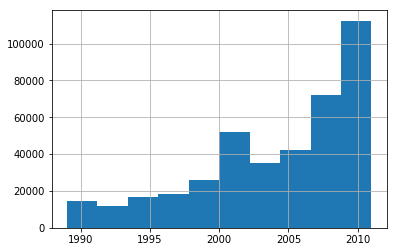

In [10]:
df2.saledate.hist()

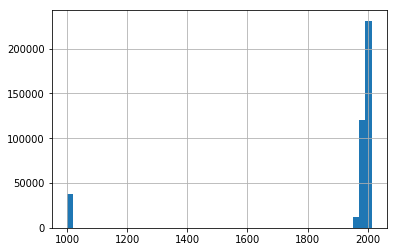

In [11]:
df2.YearMade.hist(bins=50)

- Year Made appears to have a lot of 1000 values, let's impute this data by replacing the values with the median year.

In [21]:
df[df.YearMade!=1000].YearMade.median()

1996.0

In [22]:
def clean_year(num):
    if num == 1000:
        return 1996
    else:
        return num

In [25]:
df2.YearMade = df2.YearMade.apply(lambda x: clean_year(x))

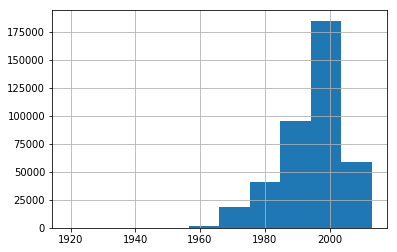

In [26]:
df2.YearMade.hist()

- Now we can get the Age and drop YearMade and saledate

In [27]:
df2['Age']=df2['saledate']-df2['YearMade']

In [28]:
df2.drop(['YearMade','saledate'],axis=1,inplace=True)

- Let's start converting the categoricals using get_dummies.
- Then we add them to our dataframe
- Finally we drop the categorical columns

In [29]:
df2 = pd.concat([df2,pd.get_dummies(df2['Enclosure'])],axis=1)
df2 = pd.concat([df2,pd.get_dummies(df2['ProductGroup'])],axis=1)
df2 = pd.concat([df2,pd.get_dummies(df2['state'])],axis=1)
df2 = df2.drop(['Enclosure'], axis=1)
df2 = df2.drop(['ProductGroup'], axis=1)
df2 = df2.drop(['state'], axis=1)

In [30]:
df2.head()

,ModelID,SalePrice,Age,EROPS,EROPS AC,EROPS w AC,NO ROPS,None or Unspecified,OROPS,BL,...,Texas,Unspecified,Utah,Vermont,Virginia,Washington,Washington DC,West Virginia,Wisconsin,Wyoming
0,3157,66000,2,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,77,57000,8,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7009,10000,3,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,332,38500,10,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,17311,11000,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
df2.to_pickle("cleandf.pkl")

## Now that our dataset is ready, let's start building our model.
- First we import what we'll need
- Second we split our X and y
- We split our data into training set and test set


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

In [79]:
X = df2.drop(['SalePrice'], axis =1)
y = df2['SalePrice']

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

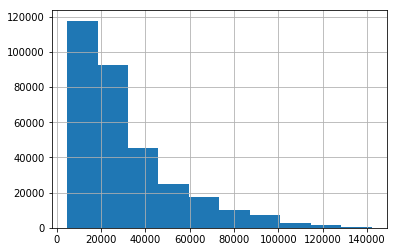

In [81]:
y_train.hist()

- let's take the log of y_train so we can get a more normalized distribution

In [82]:
y_train_log = np.log(y_train)

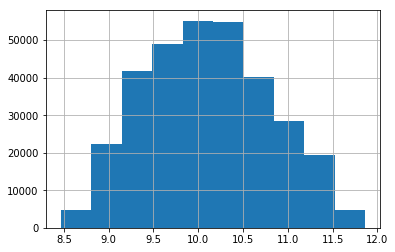

In [83]:
y_train_log.hist()

In [84]:
lin_model = LinearRegression()
lin_model.fit(X_train,y_train_log)
y_predict = lin_model.predict(X_test)

In [86]:
X_train = sm.add_constant(X_train)

In [87]:
model = sm.OLS(y_train_log,np.array(X_train))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     5401.
Date:                Fri, 14 Jun 2019   Prob (F-statistic):               0.00
Time:                        08:59:30   Log-Likelihood:            -2.2202e+05
No. Observations:              320900   AIC:                         4.442e+05
Df Residuals:                  320836   BIC:                         4.449e+05
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.8225      0.039    201.999      0.000       7.747       7.898
x1         -1.173e-05   1.44e-07    -81.693      0.000    -1.2e-05   -1.14e-05
x2            -0.0340      0.000   -260.193      0.000      -0.034      -0.034
x3             1.1960      0.046     26.088      0.000       1.106       1.286
x4             0.9833      0.126      7.802      0.000       0.736       1.230
x5             1.6746      0.046     36.522      0.000       1.585       1.764
x6             1.8162      0.239      7.590      0.000       1.347       2.285
x7             1.0818      0.052     20.683      0.000       0.979       1.184
x8             1.0707      0.046     23.355      0.000       0.981       1.161
x9             1.0904      0.007    162.070      0.000       1.077       1.104
x10            1.8479      0.007    256.296      0.000       1.834       1.862
x11            0.4687      0.007     67.059      0.000       0.455       0.482
x12            1.2925      0.007    191.408      0.000       1.279       1.306
x13            1.6041      0.007    238.158      0.000       1.591       1.617
x14            1.5189      0.007    224.823      0.000       1.506       1.532
x15            0.1446      0.006     23.443      0.000       0.132       0.157
x16            0.3196      0.026     12.511      0.000       0.270       0.370
x17            0.1515      0.006     23.701      0.000       0.139       0.164
x18            0.0487      0.009      5.350      0.000       0.031       0.067
x19            0.1879      0.004     42.514      0.000       0.179       0.197
x20            0.2083      0.006     35.311      0.000       0.197       0.220
x21            0.1456      0.007     21.863      0.000       0.133       0.159
x22            0.1366      0.023      5.865      0.000       0.091       0.182
x23            0.1899      0.004     50.415      0.000       0.183       0.197
x24            0.1400      0.005     25.775      0.000       0.129       0.151
x25            0.1399      0.050      2.793      0.005       0.042       0.238
x26            0.1790      0.012     14.742      0.000       0.155       0.203
x27            0.2068      0.006     35.146      0.000       0.195       0.218
x28            0.0791      0.009      8.908      0.000       0.062       0.097
x29            0.2219      0.016     14.285      0.000       0.191       0.252
x30            0.0727      0.021      3.452      0.001       0.031       0.114
x31            0.1256      0.008     15.880      0.000       0.110       0.141
x32            0.0938      0.007     12.874      0.000       0.080       0.108
x33            0.0535      0.008      6.633      0.000       0.038       0.069
x34            0.1180      0.006     21.125      0.000       0.107       0.129
x35            0.1290      0.030      4.304      0.000       0.070       0.188
x3

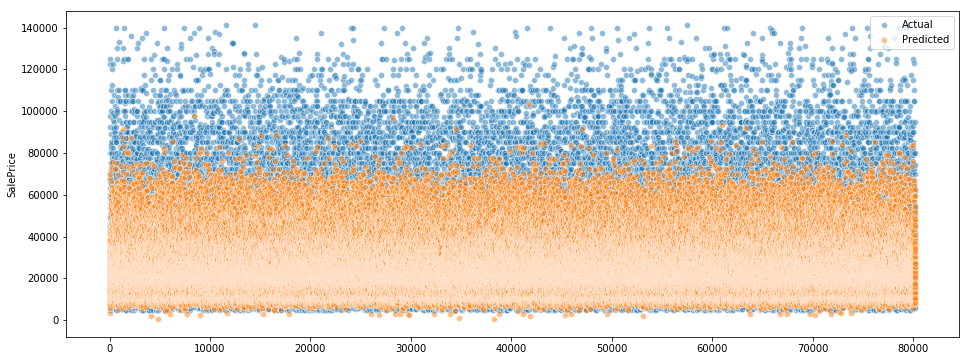

In [97]:
fig, ax = plt.subplots(figsize=(16, 6))
x = range(len(y_test))
sns.scatterplot(x,y_test,ax=ax,alpha=.5,label='Actual')
sns.scatterplot(x,np.exp(y_predict),ax=ax,alpha=.5,label='Predicted')

- We can see our predictions (orange) are consistently lower than the real price (blue)
- Let's do some cross validation with ridge
- First let's get some functions in place to help us do this

In [64]:
def rss(model, X, y):
    preds = model.predict(X)
    n = X.shape[0]
    return np.sum((y - preds)**2) / n

def train_and_test_error(regressions, X_train, y_train, X_test, y_test):
    alphas = [ridge.alpha for ridge in regressions]
    train_scores = [rss(reg, X_train, y_train) for reg in regressions]
    test_scores  = [rss(reg, X_test, y_test)   for reg in regressions]
    return pd.DataFrame({
        'train_scores': train_scores,
        'test_scores': test_scores,
    }, index=alphas)

def get_optimal_alpha(train_and_test_errors):
    test_errors = train_and_test_errors["test_scores"]
    optimal_idx = np.argmin(test_errors.values)
    return train_and_test_errors.index[optimal_idx]

def plot_train_and_test_error(ax, train_and_test_errors, 
                              alpha=1.0, linewidth=2, legend=True):
    alphas = train_and_test_errors.index
    optimal_alpha = get_optimal_alpha(train_and_test_errors)
    ax.plot(np.log10(alphas), train_and_test_errors.train_scores,
            label="Train MSE",
            color="blue", 
            linewidth=linewidth, alpha=alpha)
    ax.plot(np.log10(alphas), train_and_test_errors.test_scores, 
            label="Test MSE",
            color="red", 
            linewidth=linewidth, alpha=alpha)
    ax.axvline(x=np.log10(optimal_alpha), color="grey", alpha=alpha)
    ax.set_xlabel(r"$\log_{10}(\alpha)$")
    ax.set_ylabel("Mean Squared Error")
    ax.set_title("Mean Squared Error vs Regularization Strength")
    if legend:
        ax.legend()

In [90]:
from sklearn.linear_model import Ridge
## create a grid of various values of alpha
##   on the log scale (base 10 here)
ridge_regularization_strengths = np.logspace(
    np.log10(10**(-6)), np.log10(10**4), num=100)

In [65]:
from sklearn.model_selection import KFold

In [92]:
n_folds=10

cv_models = []
errors = []
splitter = KFold(n_splits=n_folds)
for train_idxs, test_idxs in splitter.split(df2):
    # Split the raw data into train and test
    train, test = df2.iloc[train_idxs], df2.iloc[test_idxs]
    X_train_cv = train.drop(['SalePrice'], axis =1)
    y_train_cv = np.log(train['SalePrice'])
    X_test_cv = test.drop(['SalePrice'], axis =1)
    y_test_cv = np.log(test['SalePrice'])
    
    
    # Fit all the models at different regularization strengths
    ridge_regressions = []
    for alpha in ridge_regularization_strengths:
        ridge = Ridge(alpha=alpha)
        ridge.fit(X_train_cv, y_train_cv)
        ridge_regressions.append(ridge)
    cv_models.append(ridge_regressions)
    
    # Calculate the error curves for each CV fold, for each regularization strength
    train_and_test_errors = train_and_test_error(
        ridge_regressions, X_train_cv, y_train_cv, X_test_cv, y_test_cv)
    errors.append(train_and_test_errors)
    
    # Calculate the mean errors across all CV folds, for each regularization strength
    train_errors = np.empty(shape=(n_folds, len(ridge_regularization_strengths)))
    for idx, tte in enumerate(errors):
        te = tte['train_scores']
        train_errors[idx, :] = te
    mean_train_errors = np.mean(train_errors, axis=0)
    
    test_errors = np.empty(shape=(n_folds, len(ridge_regularization_strengths)))
    for idx, tte in enumerate(errors):
        te = tte['test_scores']
        test_errors[idx, :] = te
    mean_test_errors = np.mean(test_errors, axis=0)
    
    mean_errors = pd.DataFrame({
        'train_scores': mean_train_errors,
        'test_scores': mean_test_errors,
    }, index=ridge_regularization_strengths)

- Let's plot the errors

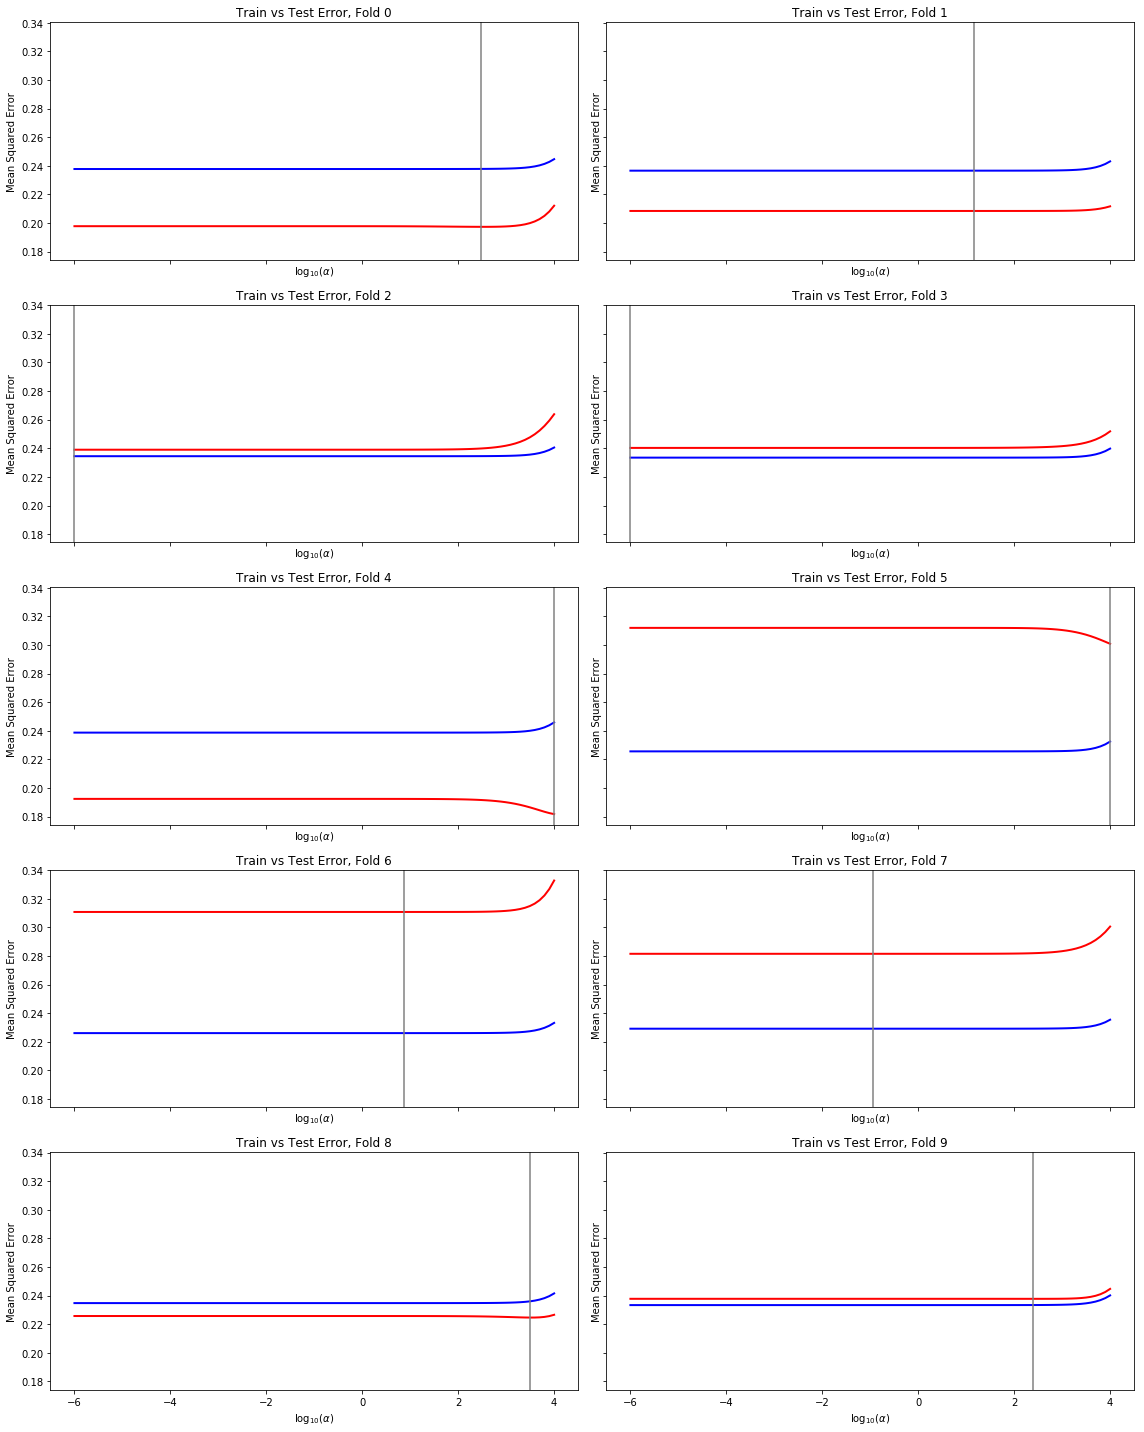

In [93]:
fig, axs = plt.subplots(5, 2, figsize=(16, 20), 
                        sharex=True, sharey=True)

for idx, (ax, ttes) in enumerate(zip(axs.flatten(), errors)):
    ## question: could you tell which color indicates training error?
    ##           how?
    plot_train_and_test_error(ax, ttes, legend=False)
    ax.set_title("Train vs Test Error, Fold {}".format(idx))
fig.tight_layout()

To get a final value of $\alpha$ to use, we average these training and testing error curves, and then take the minimum average testing error.  This leads to a more stable estimate of $\alpha$, and is a best practice.

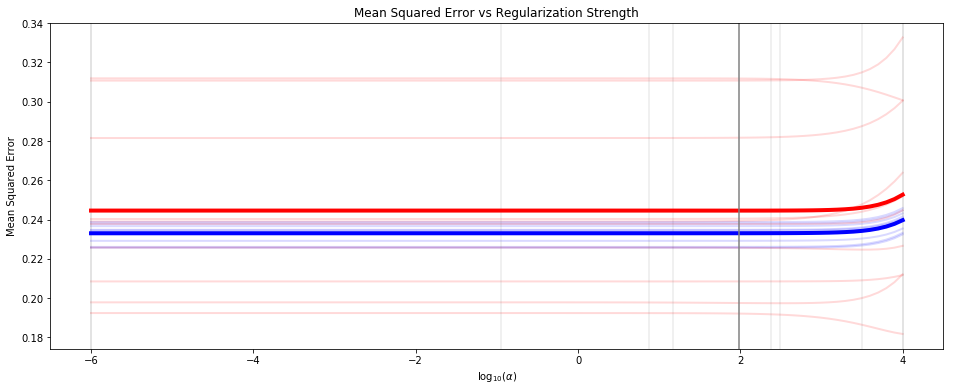

In [94]:
fig, ax = plt.subplots(figsize=(16, 6))

for ttes in errors:
    plot_train_and_test_error(ax, ttes, alpha=0.15, legend=False)
plot_train_and_test_error(ax, mean_errors, linewidth=4, legend=False)